In [6]:
%matplotlib inline

import string

import matplotlib.pyplot as plt
import numpy as np


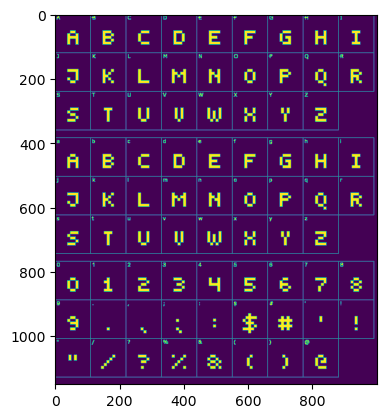

In [8]:
font = plt.imread('smallest-pixel-7-font-character-map.png')
font = font[:,:,3] #.sum(axis=2)
font[font > 0] = 1
plt.imshow(font)

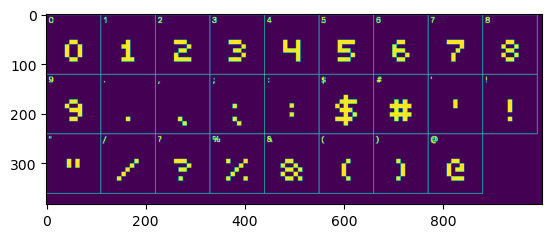

In [9]:
plt.imshow(font[767:, :])

In [481]:
i_step = 120
j_step = 110
char_to_pixels = {}

idx = 0
letters = string.ascii_uppercase + ' '

for i in range(1, i_step*3 + 1, i_step):
    for j in range(1, font.shape[1] - j_step, j_step):
        im = font[i:i+i_step:8, j:j+j_step:8]
        im = im[6:13, 4:10]
        #plt.imshow(im)
        #plt.show()
        char_to_pixels[letters[idx]] = im
        idx += 1

In [482]:
idx = 0
letters = string.digits + '.,;:$#\'!"/?%&()@ '

for i in range(767, i_step*3 + 767, i_step):
    for j in range(1, font.shape[1] - j_step, j_step):
        im = font[i:i+i_step:8, j:j+j_step:8]
        im = im[6:13, 4:10]
        #print(letters[idx])
        #plt.imshow(im)
        #plt.show()
        char_to_pixels[letters[idx]] = im
        idx += 1

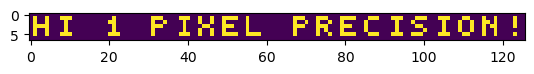

In [660]:
fname = 'msg.txt'
message = "hi 1 pixel precision!".upper()
#message = "hi!".upper()

message_letters = [char_to_pixels[c] for c in message]
message_pixels = np.concatenate(message_letters, axis=1)

plt.imshow(message_pixels)

In [661]:
message_pixels.shape

(7, 126)

In [662]:
def sync(commands):
    synced = []
    for idx, cmd in enumerate(commands):
        if cmd[0] == 'noop':
            synced.append(('noop', 0))
        if cmd[0] == 'addx':
            synced.append(('noop', 0))
            synced.append(cmd)
    return synced

def execute(synced):
    X_hist = [[] for _ in range(len(synced))]
    X = 1
    for idx, cmd in enumerate(synced):
        X += int(cmd[1])
        # idx + 2 : cycles start counting at 1, and this is at the end of the cycle
        X_hist[idx] = (idx + 2, X)
    return X_hist

def crt_display(signal, height, width):
    crt = np.zeros((height, width), dtype=int)
    for idx, center in signal:
        line = (idx-1) // width
        pos = (idx-1) % width
        if pos in [center-1, center, center+1]:
            crt[line, pos] = 1
    return crt

In [663]:
height, width = message_pixels.shape
crt = message_pixels.ravel().astype(int)

In [664]:
X = 1
target_signal = np.zeros_like(crt)
instr = []

away = 100
x = 1
queue = []
for index, pair in enumerate(crt.reshape([-1, 2])):
    cycle = 2 * index
    line = cycle // width
    pos = cycle % width
    match tuple(pair):
        case (0, 0):
            if len(queue) > 0:
                i = queue.pop()
                x = pos -124
            else:
                i = 'addx 0'
        case (1, 1):
            i = f'addx {pos - x + 1}'
            x = pos + 1
            queue = []
        case (1, 0):
            i = f'addx {pos - 2 - x + 1}'
            x = pos - 2 + 1
            queue = []
        case (0, 1):
            i = f'addx {pos + 1 - x + 1}'
            x = pos + 1 + 1
            queue = ['addx -124']
    instr.append(i)
    #print(index, pos, pair, instr[-1])

In [665]:
#instr = [f'addx {s}' if s != 1 else 'noop' for s in np.diff(target_signal)]
#instr

In [666]:
len(instr), len(crt)

(441, 882)

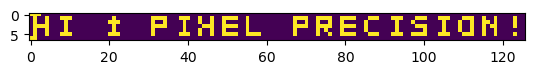

In [667]:
commands = [line.split() for line in instr[1:]]
signal = execute(sync(commands))
signal.insert(0, [1, 1])
plt.imshow(crt_display(signal, height, width))

In [668]:
width

126

In [669]:
len(signal), len(crt)

(881, 882)

In [671]:
with open('message2.txt', 'w') as f:
    f.write('\n'.join(instr))

In [257]:
all_instructions = (
    '\n'.join(pixels)
    + '\n\n'
    + '\n'.join(instructions[::-1])
)
with open(fname, 'w') as f:
    f.write(all_instructions)